Get data

In [8]:
file_path = "./data/X.csv"
X = pd.read_csv(file_path)

file_path = "./data/y.csv"
y = pd.read_csv(file_path)


In [9]:
df = X.join(y.set_index('id'))

df_mod = df

# clear all null lines
for column in df_mod.columns:
    nulls_mask = df_mod[column].notnull()  # or column_with_nulls.isna()
    df_mod = df_mod[nulls_mask]

# rename unnamed columns
df_mod.rename(columns={'Unnamed: 0.1': 'col1'}, inplace=True)
df_mod.drop(columns='Unnamed: 0', inplace=True)

# deal with categorial columns

# get all relevant column names
categorical_columns = df_mod.select_dtypes(include=['object']).columns.tolist()

drop_categorial = True
if (drop_categorial):
    df_mod = df_mod.drop(columns=categorical_columns)
else:
    # drop some of them
    categorical_columns_remove = 'Job Title'
    categorical_columns = [item for item in categorical_columns if item != categorical_columns_remove]


    df_mod = pd.get_dummies(df_mod,columns = categorical_columns)

df = df_mod


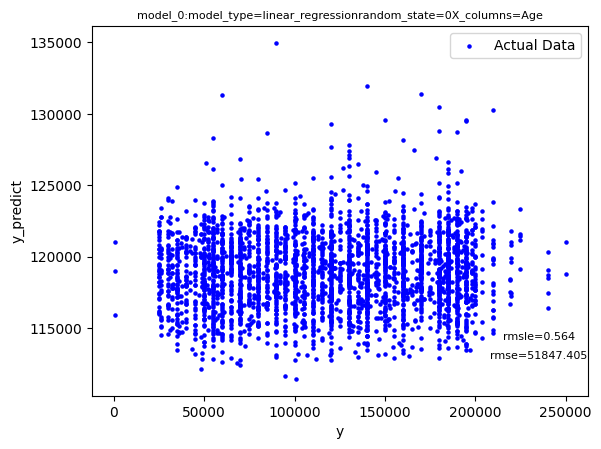

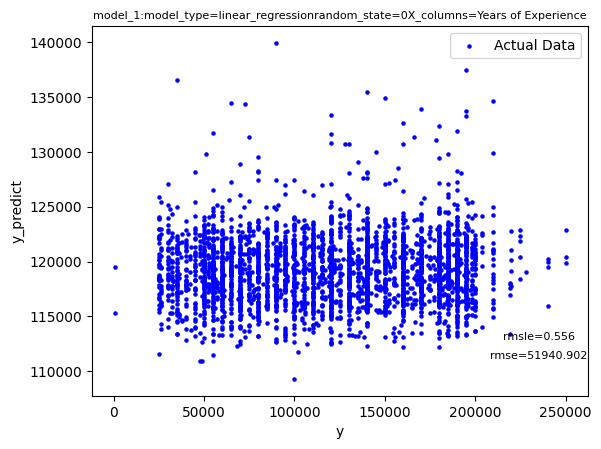

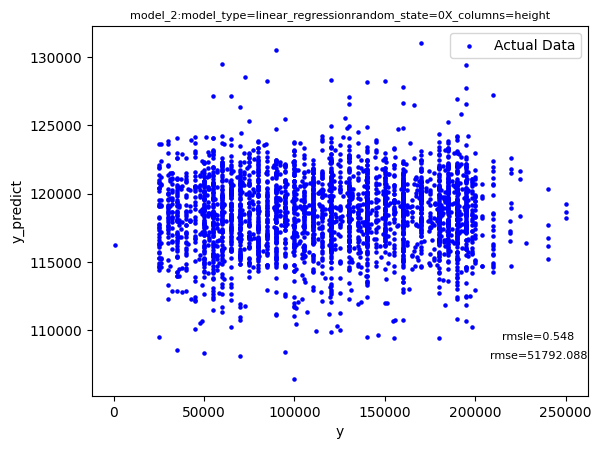

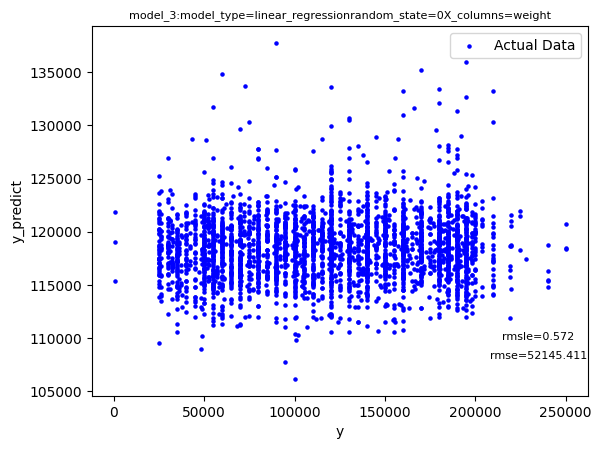

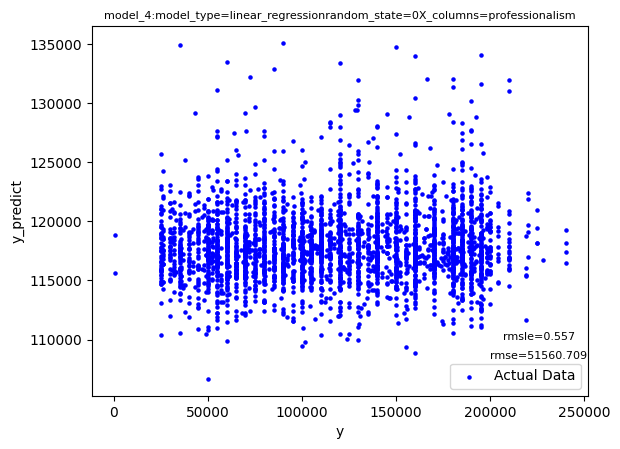

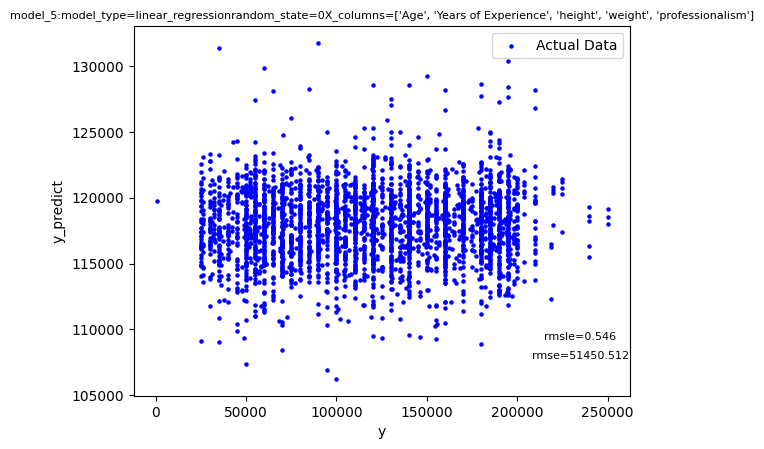

In [10]:
AI_pipe_line = AI_PIPE_LINE()

AI_pipe_line.prepare_data(df)

X_columns_base = list(df.columns.drop(['Salary','id','col1']))
X_columns = [item for item in X_columns_base if item not in categorical_columns]
X_columns.append(X_columns_base)


y_cloumn = 'Salary'

# linear regression on single features
params_config_dic = {
                     'model_type':['linear_regression'],
                     'random_state':[0],
                     'X_columns':X_columns
                     }

# params_permutes_list = AI_pipe_line.get_permutations(params_config_dic)
# # Lasso regression on multiple featrures

# params_config_dic = {
#                      'model_type':['lasso'],
#                      'random_state':[0],
#                      'X_columns':X_columns
#                      }

params_permutes_list = AI_pipe_line.get_permutations(params_config_dic)

# split to train and test



for params_dic in params_permutes_list:
    X_train, X_test, y_train, y_test = AI_pipe_line.train_test_split(X_columns_base,y_cloumn)

    # create predictor
    predictor = AI_pipe_line.add_predictor()

    # fit model
    predictor.fit(X_train, y_train,params_dic['model_type'],params_dic)

    predictor.plot_prediction(X_train,y_train,axes=None)
    
#     # predict and eval on train
#     y_train_predict = predictor.predict(X_train)
#     stats = predictor.evaluate(y_train,y_train_predict,'train')

#     # predict and eval on test
#     y_test_predict = predictor.predict(X_test)
#     stats = predictor.evaluate(y_test,y_test_predict,'test')


# filter the predictors
# predictors_filter = {'model_type':'linear_regression'}    
    
# collect the stats from all the predictors
# stats = AI_pipe_line.get_stats(['rmse_train','rmse_test'])

# AI_pipe_line.plot_stats(stats_names=['rmse_train','rmse_test'])

# AI_pipe_line.predictors['model_0'].plot_prediction(X_test,y_test,axes=None)


In [11]:
# predictor.fit(X_train, y_train,params_dic['model_type'],params_dic)
# AI_pipe_line.predictors['model_4'].plot_prediction(X_test,y_test,axes=None)
params_permutes_list


[{'model_type': 'linear_regression', 'random_state': 0, 'X_columns': 'Age'},
 {'model_type': 'linear_regression',
  'random_state': 0,
  'X_columns': 'Years of Experience'},
 {'model_type': 'linear_regression', 'random_state': 0, 'X_columns': 'height'},
 {'model_type': 'linear_regression', 'random_state': 0, 'X_columns': 'weight'},
 {'model_type': 'linear_regression',
  'random_state': 0,
  'X_columns': 'professionalism'},
 {'model_type': 'linear_regression',
  'random_state': 0,
  'X_columns': ['Age',
   'Years of Experience',
   'height',
   'weight',
   'professionalism']}]

In [12]:
y_test

5320     55000.0
1070    170000.0
3508     45000.0
3067    179756.0
1450     70000.0
          ...   
4484     77000.0
4093     80000.0
4478     61000.0
633     180000.0
2507     82683.0
Name: Salary, Length: 1068, dtype: float64

In [13]:
params_dic

{'model_type': 'linear_regression',
 'random_state': 0,
 'X_columns': ['Age',
  'Years of Experience',
  'height',
  'weight',
  'professionalism']}